In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import math
from sklearn.ensemble import RandomForestRegressor

# some lines of codes were used from:
# https://www.kaggle.com/code/mkoerner1/iron-mining-production-prediction
# https://www.kaggle.com/code/rogerbellavista/randomforestregressor-mae-0-0922-rmse-0-2314

In [2]:
df_main = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv',decimal = ',')

In [3]:
df_main

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [4]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   % Iron Feed                   737453 non-null  float64
 2   % Silica Feed                 737453 non-null  float64
 3   Starch Flow                   737453 non-null  float64
 4   Amina Flow                    737453 non-null  float64
 5   Ore Pulp Flow                 737453 non-null  float64
 6   Ore Pulp pH                   737453 non-null  float64
 7   Ore Pulp Density              737453 non-null  float64
 8   Flotation Column 01 Air Flow  737453 non-null  float64
 9   Flotation Column 02 Air Flow  737453 non-null  float64
 10  Flotation Column 03 Air Flow  737453 non-null  float64
 11  Flotation Column 04 Air Flow  737453 non-null  float64
 12  Flotation Column 05 Air Flow  737453 non-nul

In [5]:
df_main.groupby('date').count()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,174,174,174,174,174,174,174,174,174,174,...,174,174,174,174,174,174,174,174,174,174
2017-03-10 02:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
2017-03-10 03:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
2017-03-10 04:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
2017-03-10 05:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 19:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
2017-09-09 20:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
2017-09-09 21:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180


In [6]:
df_main['date']

0         2017-03-10 01:00:00
1         2017-03-10 01:00:00
2         2017-03-10 01:00:00
3         2017-03-10 01:00:00
4         2017-03-10 01:00:00
                 ...         
737448    2017-09-09 23:00:00
737449    2017-09-09 23:00:00
737450    2017-09-09 23:00:00
737451    2017-09-09 23:00:00
737452    2017-09-09 23:00:00
Name: date, Length: 737453, dtype: object

In [7]:
counts = df_main.groupby('date').count()

In [8]:
counts[counts['% Iron Feed']<180]

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,174,174,174,174,174,174,174,174,174,174,...,174,174,174,174,174,174,174,174,174,174
2017-04-10 00:00:00,179,179,179,179,179,179,179,179,179,179,...,179,179,179,179,179,179,179,179,179,179


we can assume that measurements were taken 3 times a minute with 20 sec interval, but for initial hour some measurements are missing and 1 measurement for other time
Let's change dataframe so it will have seconds intervals and remove those where data is missing

In [9]:
df_main.iloc[0,0]

'2017-03-10 01:00:00'

In [10]:
df_main['date'].unique().shape

(4097,)

In [11]:
df_main.iloc[-1,0]

'2017-09-09 23:00:00'

In [12]:
date_range = pd.date_range(start = df_main.iloc[0,0],end = '2017-09-10 00:00:00',freq  ="20s")

In [13]:
len(date_range)

794701

In [14]:
type(date_range)

pandas.core.indexes.datetimes.DatetimeIndex

In [15]:
dates = []
for i in df_main['date'].unique():
    dates.append(i)

In [16]:
len(dates)

4097

In [17]:
dates

['2017-03-10 01:00:00',
 '2017-03-10 02:00:00',
 '2017-03-10 03:00:00',
 '2017-03-10 04:00:00',
 '2017-03-10 05:00:00',
 '2017-03-10 06:00:00',
 '2017-03-10 07:00:00',
 '2017-03-10 08:00:00',
 '2017-03-10 09:00:00',
 '2017-03-10 10:00:00',
 '2017-03-10 11:00:00',
 '2017-03-10 12:00:00',
 '2017-03-10 13:00:00',
 '2017-03-10 14:00:00',
 '2017-03-10 15:00:00',
 '2017-03-10 16:00:00',
 '2017-03-10 17:00:00',
 '2017-03-10 18:00:00',
 '2017-03-10 19:00:00',
 '2017-03-10 20:00:00',
 '2017-03-10 21:00:00',
 '2017-03-10 22:00:00',
 '2017-03-10 23:00:00',
 '2017-03-11 00:00:00',
 '2017-03-11 01:00:00',
 '2017-03-11 02:00:00',
 '2017-03-11 03:00:00',
 '2017-03-11 04:00:00',
 '2017-03-11 05:00:00',
 '2017-03-11 06:00:00',
 '2017-03-11 07:00:00',
 '2017-03-11 08:00:00',
 '2017-03-11 09:00:00',
 '2017-03-11 10:00:00',
 '2017-03-11 11:00:00',
 '2017-03-11 12:00:00',
 '2017-03-11 13:00:00',
 '2017-03-11 14:00:00',
 '2017-03-11 15:00:00',
 '2017-03-11 16:00:00',
 '2017-03-11 17:00:00',
 '2017-03-11 18:

In [18]:
dates_dict = {}
for i in range(len(dates)):
    dates_dict[dates[i]] = i
               

In [19]:
date_range = date_range.format()

In [20]:
date_range[0][:14]+'00:00'

'2017-03-10 01:00:00'

In [21]:
hours = []
for i in date_range:
    if i[:13]+':00:00' in dates_dict:
        hours.append(i)

In [22]:
len(hours)

737460

now we need to delete missing times
it means first 2 mins(6 values)

In [23]:
hours = hours[6:]

In [24]:
hours

['2017-03-10 01:02:00',
 '2017-03-10 01:02:20',
 '2017-03-10 01:02:40',
 '2017-03-10 01:03:00',
 '2017-03-10 01:03:20',
 '2017-03-10 01:03:40',
 '2017-03-10 01:04:00',
 '2017-03-10 01:04:20',
 '2017-03-10 01:04:40',
 '2017-03-10 01:05:00',
 '2017-03-10 01:05:20',
 '2017-03-10 01:05:40',
 '2017-03-10 01:06:00',
 '2017-03-10 01:06:20',
 '2017-03-10 01:06:40',
 '2017-03-10 01:07:00',
 '2017-03-10 01:07:20',
 '2017-03-10 01:07:40',
 '2017-03-10 01:08:00',
 '2017-03-10 01:08:20',
 '2017-03-10 01:08:40',
 '2017-03-10 01:09:00',
 '2017-03-10 01:09:20',
 '2017-03-10 01:09:40',
 '2017-03-10 01:10:00',
 '2017-03-10 01:10:20',
 '2017-03-10 01:10:40',
 '2017-03-10 01:11:00',
 '2017-03-10 01:11:20',
 '2017-03-10 01:11:40',
 '2017-03-10 01:12:00',
 '2017-03-10 01:12:20',
 '2017-03-10 01:12:40',
 '2017-03-10 01:13:00',
 '2017-03-10 01:13:20',
 '2017-03-10 01:13:40',
 '2017-03-10 01:14:00',
 '2017-03-10 01:14:20',
 '2017-03-10 01:14:40',
 '2017-03-10 01:15:00',
 '2017-03-10 01:15:20',
 '2017-03-10 01:

In [25]:
hours.remove('2017-04-10 00:00:00')

In [26]:
len(hours)

737453

In [27]:
df_main['index'] = hours
df_main['index'] = pd.to_datetime(df_main['index'])
df_main.index = df_main['index']
df_main = df_main.loc[:, df_main.columns[:-1]]
df_main['date'] = pd.to_datetime(df_main['date'])
df_main.rename(columns={'date': 'hourly date'}, inplace=True)
df_main.head()

,hourly date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
index,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:02:00,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:02:20,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:02:40,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:03:00,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:03:20,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [28]:
df_main.index

DatetimeIndex(['2017-03-10 01:02:00', '2017-03-10 01:02:20',
               '2017-03-10 01:02:40', '2017-03-10 01:03:00',
               '2017-03-10 01:03:20', '2017-03-10 01:03:40',
               '2017-03-10 01:04:00', '2017-03-10 01:04:20',
               '2017-03-10 01:04:40', '2017-03-10 01:05:00',
               ...
               '2017-09-09 23:56:40', '2017-09-09 23:57:00',
               '2017-09-09 23:57:20', '2017-09-09 23:57:40',
               '2017-09-09 23:58:00', '2017-09-09 23:58:20',
               '2017-09-09 23:58:40', '2017-09-09 23:59:00',
               '2017-09-09 23:59:20', '2017-09-09 23:59:40'],
              dtype='datetime64[ns]', name='index', length=737453, freq=None)

In [29]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 737453 entries, 2017-03-10 01:02:00 to 2017-09-09 23:59:40
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   hourly date                   737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null 

Now I want to see how many unique values are present within an hour

In [30]:
df_main.groupby('hourly date')['Starch Flow'].count().unique()

array([174, 180, 179])

In [31]:
df_main.groupby('hourly date').apply(lambda x: len(x['Starch Flow'].unique())).mean()

177.12618989504514

In [32]:
df_main.columns[1:]

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [33]:
unique_avg = []
for column in df_main.columns[1:]:
    unique_avg.append(df_main.groupby('hourly date').apply(lambda x: len(x[column].unique())).mean())
    
    

In [34]:
unique_avg

[1.0,
 1.0,
 177.12618989504514,
 175.52135709055406,
 176.59653404930438,
 171.31437637295582,
 172.15206248474493,
 153.32902123505005,
 175.64168904076152,
 160.64071271662192,
 147.57432267512814,
 153.96167927752015,
 162.34049304369051,
 167.99023675860386,
 174.40444227483525,
 177.2592140590676,
 176.8425677324872,
 178.8149865755431,
 177.75835977544546,
 178.02050280693192,
 178.23993165731022,
 10.437149133512326,
 14.544056626800097]

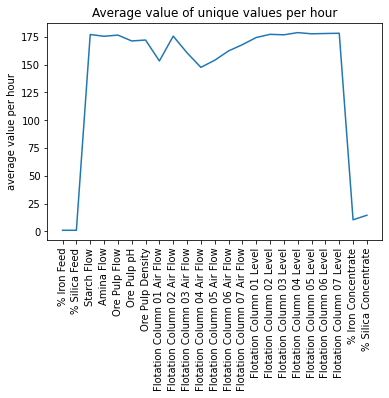

In [35]:
plt.plot(df_main.columns[1:],unique_avg)
plt.rcParams['figure.figsize'] = (5,5)

plt.xticks(rotation=90)
plt.title('Average value of unique values per hour')
plt.ylabel('average value per hour')
plt.show()

In [36]:
unique_avg[-2:]

[10.437149133512326, 14.544056626800097]

we can see from the graph that only Iron Feed and Silica Feed values are not changed within an hour, while most of the variables have changes around 180 per hour.
Exceptions are Iron Concentrate and Silica Concentrates. Which might show some inconsistencies within the data

In [37]:
df_main.groupby('hourly date').apply(lambda x: len(x['% Iron Concentrate'].unique())).unique()

array([  1, 180])

In [38]:
df_main.groupby('hourly date').apply(lambda x: len(x['% Silica Concentrate'].unique())).unique()

array([  1, 180])

In [39]:
iron_concentrate = df_main.groupby('hourly date').apply(lambda x: len(x['% Iron Concentrate'].unique()))

In [40]:
iron_concentrate[iron_concentrate>1]

hourly date
2017-03-12 12:00:00    180
2017-04-02 08:00:00    180
2017-04-02 09:00:00    180
2017-04-03 03:00:00    180
2017-04-03 12:00:00    180
                      ... 
2017-09-05 21:00:00    180
2017-09-05 22:00:00    180
2017-09-05 23:00:00    180
2017-09-06 00:00:00    180
2017-09-06 01:00:00    180
Length: 216, dtype: int64

In [41]:
silica_concentrate = df_main.groupby('hourly date').apply(lambda x: len(x['% Silica Concentrate'].unique()))

In [42]:
silica_concentrate = silica_concentrate[silica_concentrate>1]

In [43]:
problem_hours = silica_concentrate.index.format()

In [44]:
len(problem_hours)

310

In [45]:
df_main.shape

(737453, 24)

In [46]:
clean_df = df_main[~df_main['hourly date'].isin(problem_hours)]

In [47]:
clean_df.shape

(681653, 24)

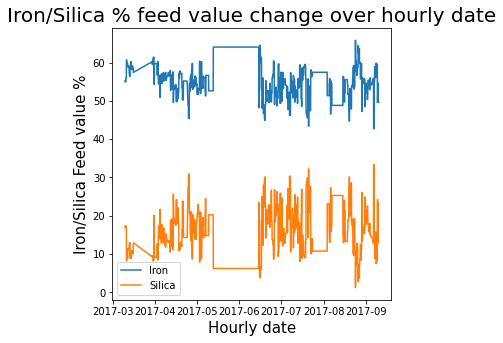

In [48]:
plt.plot(clean_df['hourly date'],clean_df['% Iron Feed'],label="Iron",)
plt.plot(clean_df['hourly date'],clean_df['% Silica Feed'],label="Silica")
plt.rcParams['figure.figsize'] = (25,5)

plt.title('Iron/Silica % feed value change over hourly date', fontsize=20)
plt.legend(loc='best')
plt.ylabel('Iron/Silica Feed value %',fontsize=15)
plt.xlabel('Hourly date',fontsize=15)

plt.show()

It seems that feed values are interpolated over some dates. Let's see that values by thei frequences

In [49]:
clean_df['% Iron Feed'].value_counts()

64.03    132660
57.46     42840
48.81     33840
52.61     14400
56.65      9180
          ...  
53.38       360
53.24       360
44.70       360
53.54       360
51.62       180
Name: % Iron Feed, Length: 275, dtype: int64

In [50]:
clean_df['% Silica Feed'].value_counts()

6.26     132660
10.80     42840
25.31     33840
20.24     14400
9.22       8640
          ...  
18.74       360
19.97       360
30.14       360
9.29        360
19.01       180
Name: % Silica Feed, Length: 290, dtype: int64

It can be noticed that some values both in Iron and Silica have same number of occurences. Let's get rid of data where the values seem to be interpolated

In [51]:
frequent_iron = clean_df['% Iron Feed'].value_counts().index[:4].format()
frequent_silica = clean_df['% Silica Feed'].value_counts().index[:4].format()

In [52]:
frequent_iron

['64.03', '57.46', '48.81', '52.61']

In [53]:
frequent_silica

['6.26 ', '10.80', '25.31', '20.24']

In [54]:
float(frequent_iron[0])

64.03

In [55]:
clean_df[clean_df['% Iron Feed']!=64.03].shape

(548993, 24)

In [56]:
for i in range(4):
    clean_df= clean_df[clean_df['% Iron Feed']!=float(frequent_iron[i])]

In [57]:
for i in range(4):
    clean_df= clean_df[clean_df['% Silica Feed']!=float(frequent_iron[i])]

In [58]:
df_main.shape


(737453, 24)

In [59]:
clean_df.shape

(457913, 24)

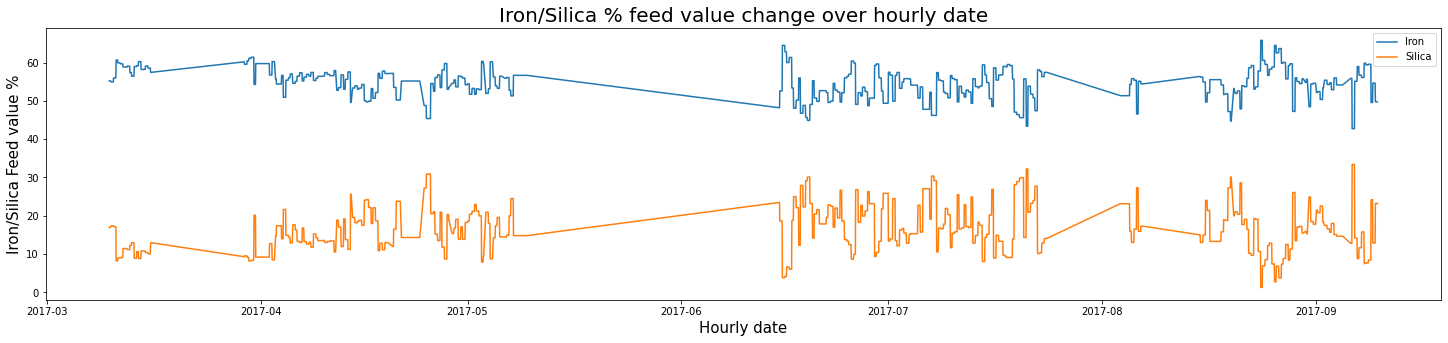

In [60]:
plt.plot(clean_df['hourly date'],clean_df['% Iron Feed'],label="Iron",)
plt.plot(clean_df['hourly date'],clean_df['% Silica Feed'],label="Silica")
plt.rcParams['figure.figsize'] = (25,5)

plt.title('Iron/Silica % feed value change over hourly date', fontsize=20)
plt.legend(loc='best')
plt.ylabel('Iron/Silica Feed value %',fontsize=15)
plt.xlabel('Hourly date',fontsize=15)

plt.show()

# Heatmap for correlations

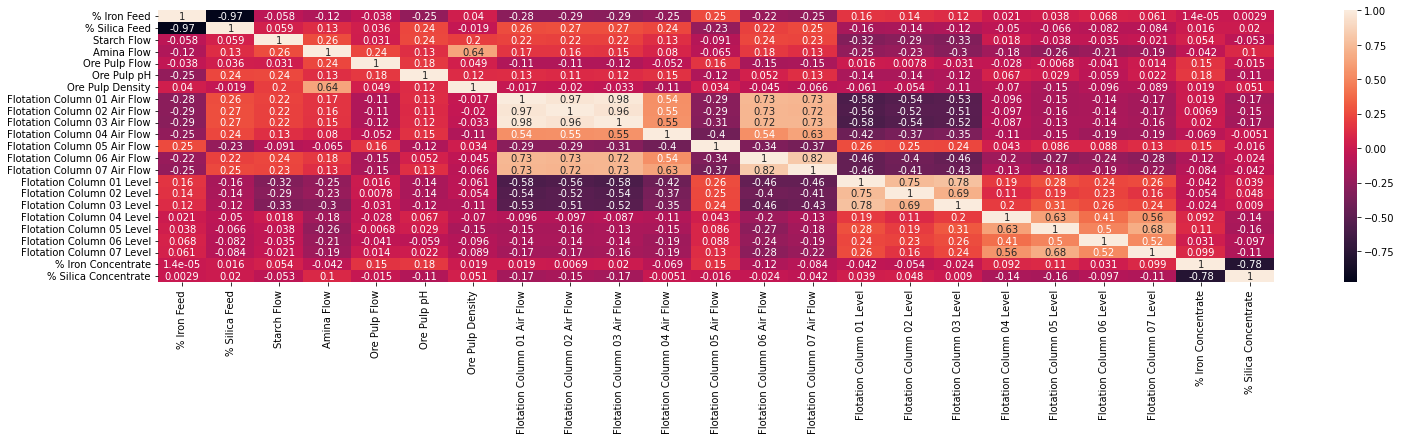

In [61]:
sns.heatmap(clean_df.corr(),annot=True)
plt.rcParams['figure.figsize'] = (15,20)


In [62]:
clean_df.columns

Index(['hourly date', '% Iron Feed', '% Silica Feed', 'Starch Flow',
       'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [63]:
pair_columns = list(clean_df.columns[1:8])
pair_columns.extend(clean_df.columns[-2:])
print(pair_columns)


['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', '% Iron Concentrate', '% Silica Concentrate']


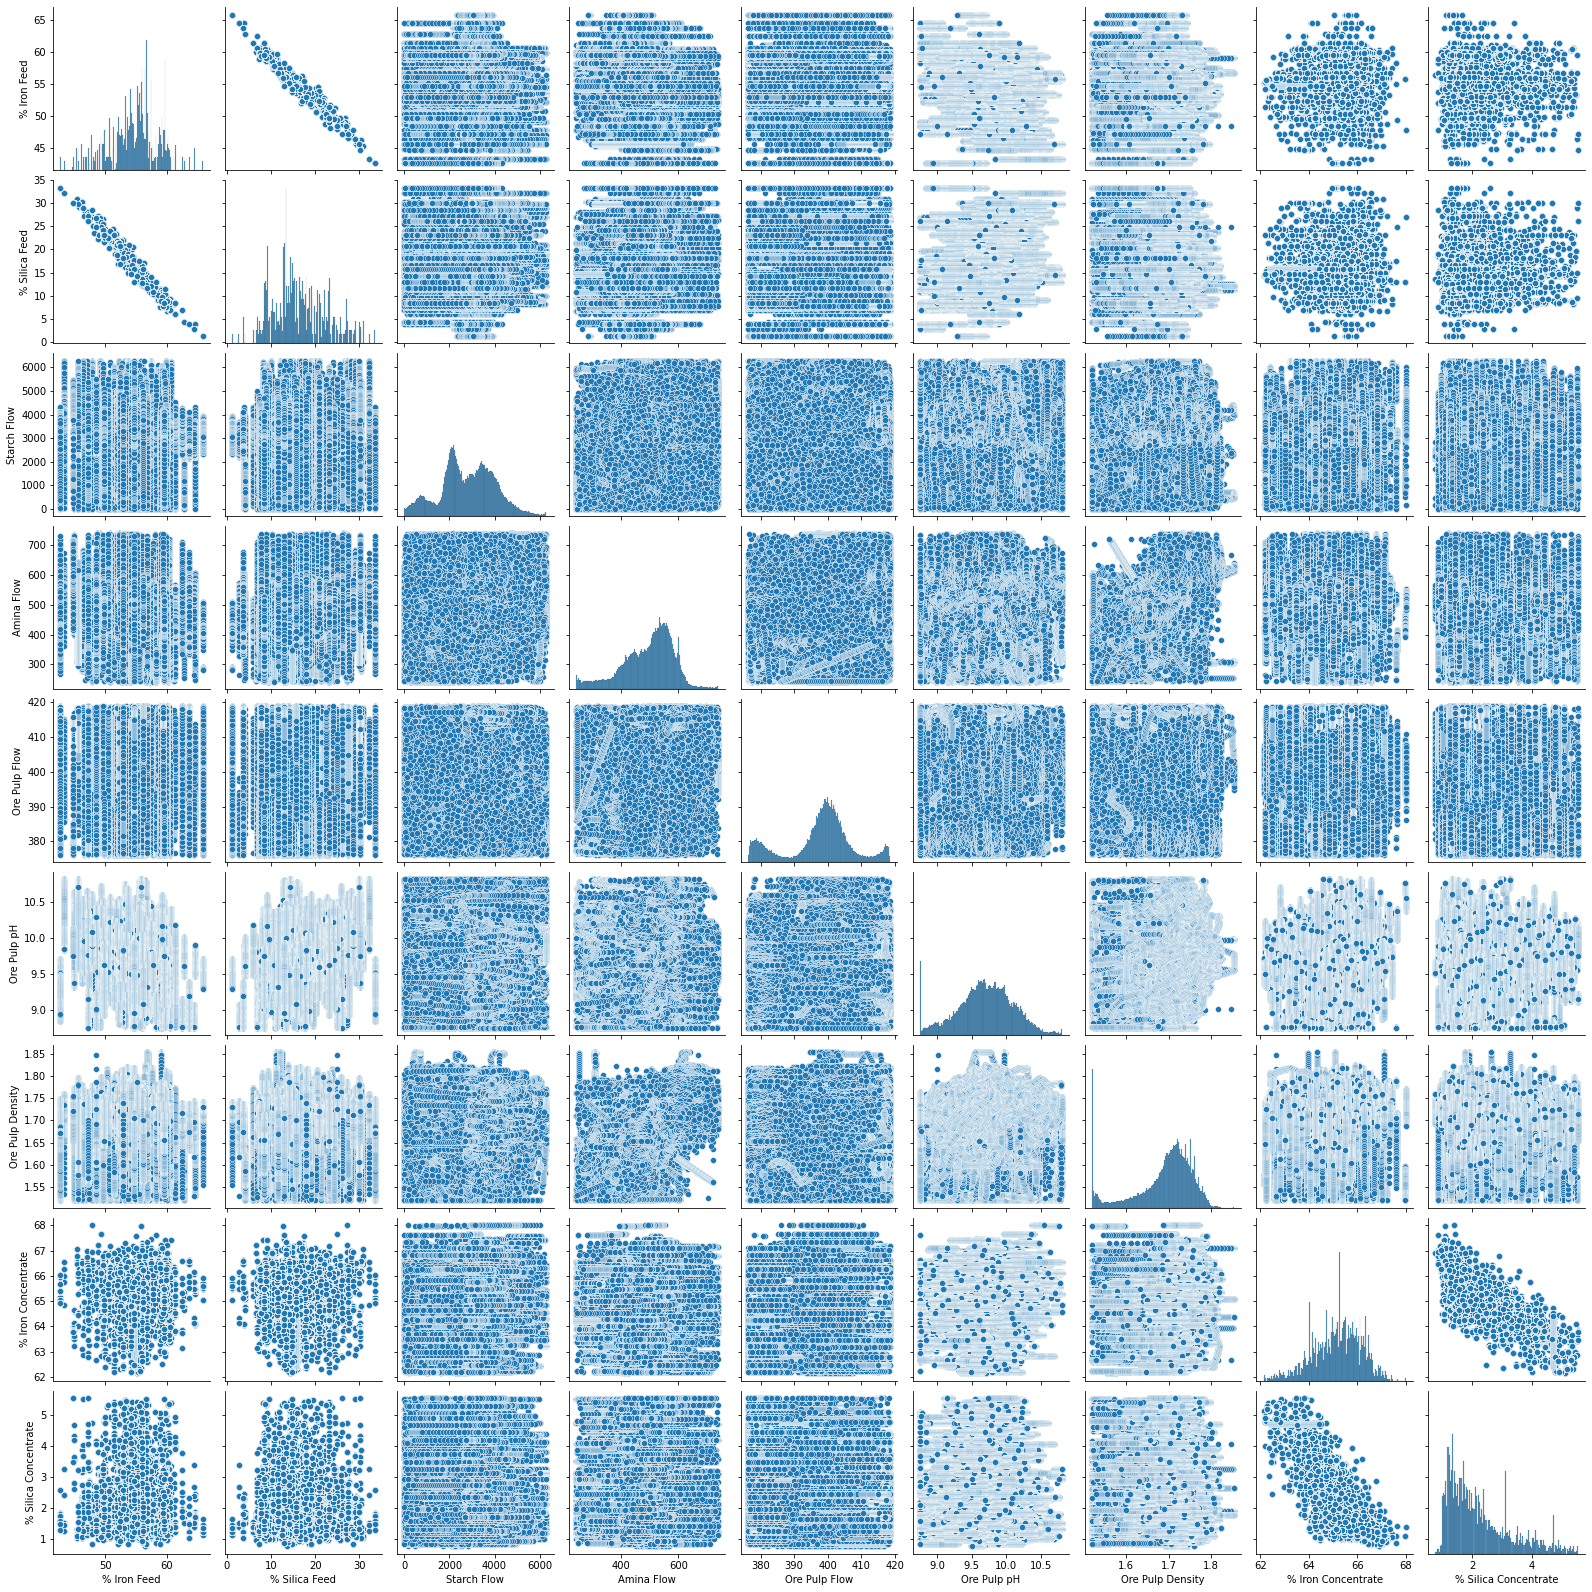

In [64]:
sns.pairplot(clean_df.loc[:,pair_columns])
plt.show()

In [65]:
clean_df

,hourly date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
index,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:02:00,2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:02:20,2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:02:40,2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:03:00,2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:03:20,2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 23:58:20,2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
2017-09-09 23:58:40,2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
2017-09-09 23:59:00,2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71


In [67]:
clean_df.shape

(457913, 24)

Is it possible to predict % Silica in Concentrate whitout using % Iron Concentrate column (as they are highly correlated)?

In [68]:
split_date ='2017-09-03 00:00:00'
train_data = clean_df.loc[clean_df.index < split_date]
test_data = clean_df.loc[clean_df.index >= split_date]

In [69]:
train_data.shape, test_data.shape

((432533, 24), (25380, 24))

In [70]:
# With Iron Concentrate
X = train_data.iloc[:,1:-1]
y = train_data.iloc[:,-1]
X_test = test_data.iloc[:,1:-1]
y_test = test_data.iloc[:,-1]



In [72]:
# creation of model and training on data
model = RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor()

In [74]:
# Model results on train set
y_hat = model.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
print ("TRAIN SET")
print ("============")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", model.score(X,y))
print ("feature_importances:",model.feature_importances_)
print ("% Iron Concentrate is the highest from feature_importances")

TRAIN SET
MAE:                 0.0022069447880335743
RMSE:                0.012324181141338247
r2:                  0.9998653066337035
feature_importances: [0.04285722 0.05127316 0.00769499 0.019533   0.01135973 0.02109153
 0.01421526 0.01366837 0.00473468 0.01138787 0.01994565 0.01222452
 0.00441218 0.00204218 0.01118688 0.00734248 0.016594   0.0021002
 0.00599703 0.00516482 0.00277435 0.71239988]
% Iron Concentrate is the highest from feature_importances


In [75]:
# Results on test set
y_hat = model.predict(X_test)
mae = metrics.mean_absolute_error(y_test,y_hat)
mse = metrics.mean_squared_error(y_test,y_hat)
print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", model.score(X_test,y_test))

TEST SET
MAE:                 0.5121402541371158
RMSE:                0.6684434742173041
r2:                  0.4463506800322694


Repeat without % Iron Concentrate

In [76]:
 # Without Iron Concentrate
X2 = train_data.iloc[:,1:-2]
y2 = train_data.iloc[:,-1]
X2_test = test_data.iloc[:,1:-2]
y2_test = test_data.iloc[:,-1]

In [77]:
# creation of model and training on data
model2 = RandomForestRegressor()
model2.fit(X2,y2)
# results on train set
y2_hat = model2.predict(X2)
mae = metrics.mean_absolute_error(y2,y2_hat)
mse = metrics.mean_squared_error(y2,y2_hat)
print ("TRAIN SET( without % Iron Concentrate)")
print ("=========================================")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", model2.score(X2,y2))
print ("feature_importances:",model2.feature_importances_)


TRAIN SET( without % Iron Concentrate)
MAE:                 0.015085613179404253
RMSE:                0.055883194245118194
r2:                  0.9972305565258849
feature_importances: [0.15415022 0.14705629 0.03773625 0.07279017 0.01305421 0.12996031
 0.07150814 0.00936626 0.00455753 0.04570713 0.08832816 0.05209084
 0.03519064 0.00447144 0.02403567 0.02434608 0.04324022 0.00620297
 0.01479579 0.00854363 0.01286804]


In [78]:
# results on test set
y2_hat = model2.predict(X2_test)
mae = metrics.mean_absolute_error(y2_test,y2_hat)
mse = metrics.mean_squared_error(y2_test,y2_hat)
print ("TEST SET( without % Iron Concentrate)")
print ("=====================================")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", model2.score(X2_test,y2_test))


TEST SET( without % Iron Concentrate)
MAE:                 1.0849882795981869
RMSE:                1.4031630998941331
r2:                  -1.4396173068964142


------------------------------------------------------------------------------------------

With resetting index and removing hourly date

In [79]:
clean_df.reset_index(drop=True, inplace=True)

In [80]:
clean_df = clean_df.iloc[:,1:]

In [81]:
train, test = train_test_split(clean_df, test_size=0.2)
print ('# train:',len(train))
print ('# test: ',len(test))

# train: 366330
# test:  91583


In [82]:
# Extract column to predict on train X
X = train.drop('% Silica Concentrate', axis=1)
X.head(20)

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
313854,55.42,14.93,3653.610000,548.265000,400.793000,10.27610,1.668380,298.688000,288.647000,299.698000,...,298.318000,298.834000,447.326000,243.835242,439.150000,355.751000,345.936000,351.864000,378.284000,66.57
274054,46.21,30.37,2593.410000,293.736667,406.126512,10.46260,1.521389,301.419000,295.826000,299.707000,...,301.220000,289.881000,848.101433,818.036143,870.011137,498.676000,502.085000,518.730000,471.926000,64.76
392545,57.80,10.71,2858.750000,424.982000,386.601000,9.49013,1.723300,300.803000,290.620000,297.995000,...,250.780000,304.867000,485.907000,488.428000,700.510000,569.863000,400.969000,576.928000,395.664000,66.04
269760,47.79,27.08,972.599000,447.545000,400.767000,10.33770,1.639850,297.945000,275.463000,300.538000,...,293.535000,304.811000,514.879000,445.795000,508.545000,478.345000,500.824000,508.999000,462.182000,64.18
441949,42.74,33.40,1823.331429,631.613000,409.327000,9.56258,1.690940,300.978000,304.065000,299.032000,...,304.232000,288.872000,403.716000,444.063000,410.945000,356.605000,362.716000,371.957000,360.376000,65.08
352765,55.37,16.51,2984.580000,633.545000,417.747127,10.08450,1.703970,299.054000,297.552000,299.220000,...,351.466000,349.668000,421.316000,482.225000,394.048000,322.014000,337.704000,348.884000,384.961000,65.08
279549,55.40,16.83,2916.270000,500.744000,396.098000,9.92704,1.697110,300.645000,305.393000,300.940000,...,302.157000,295.903000,510.743000,493.392000,494.374000,498.601000,519.230000,438.216000,444.971000,65.52
133723,58.05,11.85,1914.020000,507.813000,397.559000,9.56159,1.758790,200.171000,292.676000,299.927000,...,280.151000,302.783000,460.950000,405.547000,555.198000,483.203000,469.816000,474.370000,487.754000,62.79
24918,58.54,10.10,4743.650000,487.823000,394.995000,9.17810,1.683530,250.323000,248.181000,251.862000,...,249.609000,248.840000,450.064000,525.345000,463.203000,444.730000,450.128000,463.450000,433.820000,66.74
295235,50.99,22.93,2913.730000,476.525000,400.370000,10.25520,1.735800,300.946000,259.783000,299.347000,...,299.777000,303.063000,598.614000,558.625000,601.490000,509.590000,479.132000,456.188000,444.317000,65.21


In [83]:
# Create train y
y = train['% Silica Concentrate']
y.head(20)

313854    1.29
274054    3.87
392545    1.23
269760    4.73
441949    2.59
352765    2.65
279549    1.37
133723    5.10
24918     1.83
295235    1.59
340907    3.87
327012    3.71
125028    1.09
169329    2.97
37347     3.11
242230    1.76
389079    2.72
6494      1.82
194105    1.87
272333    4.73
Name: % Silica Concentrate, dtype: float64

In [84]:
# Model creation and fit
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor()

In [85]:
# Model results on  train set
y_hat = model.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
print ("TRAIN SET")
print ("============")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", model.score(X,y))
print ("feature_importances:",model.feature_importances_)
print ("last column (% Iron Concentrate) is the highest feature_importances")

TRAIN SET
MAE:                 0.002825831490736181
RMSE:                0.014254210591237305
r2:                  0.9998171885236576
feature_importances: [0.04370596 0.0478357  0.00758532 0.01708349 0.01231567 0.02432697
 0.01307978 0.01741961 0.00471424 0.01168161 0.02130833 0.01343444
 0.00392562 0.00388162 0.00917984 0.0082589  0.01773122 0.00228192
 0.00546465 0.007281   0.00288888 0.70461523]
last column (% Iron Concentrate) is the highest feature_importances


In [86]:
# Results on test set
X= test.drop('% Silica Concentrate', axis=1)
y= test['% Silica Concentrate']
y_hat = model.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", model.score(X,y))

TEST SET
MAE:                 0.007426516930001426
RMSE:                0.037007826590476633
r2:                  0.9987686923134081


Repeat without % Iron Concentrate

In [87]:
X2= train.drop(['% Silica Concentrate','% Iron Concentrate'], axis=1)
y2= train['% Silica Concentrate']
# Model creation and fit
model2 = RandomForestRegressor()
model2.fit(X2,y2)
# Results on train set
y2_hat = model2.predict(X2)
mae = metrics.mean_absolute_error(y2,y2_hat)
mse = metrics.mean_squared_error(y2,y2_hat)
print ("TRAIN SET( without % Iron Concentrate)")
print ("=========================================")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", model2.score(X2,y2))
print ("feature_importances:",model2.feature_importances_)


TRAIN SET( without % Iron Concentrate)
MAE:                 0.01766154841057388
RMSE:                0.06020564281257245
r2:                  0.9967386942978529
feature_importances: [0.15734484 0.15235556 0.03544415 0.06922349 0.01339218 0.13195887
 0.06836016 0.00996624 0.00396402 0.04247949 0.08793665 0.0656701
 0.01575569 0.00506183 0.02330218 0.02713532 0.03931351 0.00745902
 0.02100443 0.01129598 0.01157629]


In [88]:
# results on test set
X2= test.drop(['% Silica Concentrate','% Iron Concentrate'], axis=1)
y2= test['% Silica Concentrate']
y2_hat = model2.predict(X2)
mae = metrics.mean_absolute_error(y2,y2_hat)
mse = metrics.mean_squared_error(y2,y2_hat)
print ("TEST SET( without % Iron Concentrate)")
print ("=====================================")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", model2.score(X2,y2))


TEST SET( without % Iron Concentrate)
MAE:                 0.04586865180731218
RMSE:                0.14387085614015072
r2:                  0.9813909121662525
